<a href="https://colab.research.google.com/github/andzagz/Logistic-Package-Number/blob/main/beneficiarios_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Carregar os dados
file_path = "/content/drive/MyDrive/Colab Notebooks/Case beneficiarios/dados_beneficiarios_clean.csv"
df = pd.read_csv(file_path, delimiter=',', engine='python', encoding='latin-1')

# Verificar o nome correto da coluna
print(df.head)

<bound method NDFrame.head of                              Data  Beneficiarios
0   2016-03-31 23:59:59.999999999        1466988
1   2016-06-30 23:59:59.999999999        1485164
2   2016-09-30 23:59:59.999999999        1486209
3   2016-12-31 23:59:59.999999999        1488573
4   2017-03-31 23:59:59.999999999        1484912
5   2017-06-30 23:59:59.999999999        1488172
6   2017-09-30 23:59:59.999999999        1493664
7   2017-12-31 23:59:59.999999999        1504839
8   2018-03-31 23:59:59.999999999        1492904
9   2018-06-30 23:59:59.999999999        1501111
10  2018-09-30 23:59:59.999999999        1506029
11  2018-12-31 23:59:59.999999999        1505341
12  2019-03-31 23:59:59.999999999        1477748
13  2019-06-30 23:59:59.999999999        1503821
14  2019-09-30 23:59:59.999999999        1485755
15  2019-12-31 23:59:59.999999999        1471797
16  2020-03-31 23:59:59.999999999        1469759
17  2020-06-30 23:59:59.999999999        1457262
18  2020-09-30 23:59:59.999999999      

In [ ]:
import pandas as pd

# Supondo que 'df' é o seu DataFrame
df['Data'] = pd.to_datetime(df['Data'])

# Filtrar dados a partir de 2016
df = df[df['Data'] >= '2021-01-01']
print(df.head())


                            Data  Beneficiarios
20 2021-03-31 23:59:59.999999999        1497018
21 2021-06-30 23:59:59.999999999        1515111
22 2021-09-30 23:59:59.999999999        1552687
23 2021-12-31 23:59:59.999999999        1576558
24 2022-03-31 23:59:59.999999999        1584914


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Manter apenas a coluna 'Beneficiarios'
data = df['Beneficiarios'].values.reshape(-1, 1)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
print(data_scaled[:5])  # Verificar os primeiros valores normalizados


[[0.        ]
 [0.09868981]
 [0.3036513 ]
 [0.4338577 ]
 [0.47943621]]


In [ ]:
import numpy as np

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

SEQ_LENGTH = 5
X, y = create_sequences(data_scaled, SEQ_LENGTH)

print(X.shape, y.shape)  # Verificar a forma das sequências


(9, 5) (9,)


In [ ]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print(X.shape)  # Verificar a forma dos dados


(9, 5, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()  # Verificar a arquitetura do modelo


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_212 (LSTM)                      │ (None, 5, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_213 (LSTM)                      │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.6019 - val_loss: 0.8521
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5631 - val_loss: 0.7905
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.5251 - val_loss: 0.7298
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.4876 - val_loss: 0.6696
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.4502 - val_loss: 0.6094
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4128 - val_loss: 0.5491
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3752 - val_loss: 0.4886
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3374 - val_loss: 0.4280
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2994 - val_loss: 0.3674
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2612 - val_loss: 0.3074
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2232 - val_loss: 0.2485
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.1856 - val_loss: 0.1917


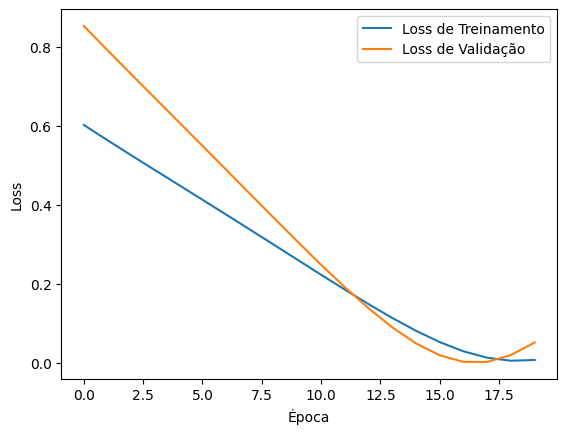

In [ ]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Verificar o histórico de treinamento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(X)

# Reverter a normalização
predictions = scaler.inverse_transform(predictions)
print(predictions[:5])  # Verificar as primeiras previsões


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
[[1595075.8]
 [1618411.5]
 [1643155.6]
 [1661472.5]
 [1675500.5]]


In [ ]:
import numpy as np

# Simular intervalo de confiança
confidence_interval = 0.05  # 5% de variação para intervalo de confiança

# Adicionar ruído ao intervalo de confiança
predictions_std = np.std(predictions) * confidence_interval
upper_bound = predictions.flatten() + predictions_std
lower_bound = predictions.flatten() - predictions_std


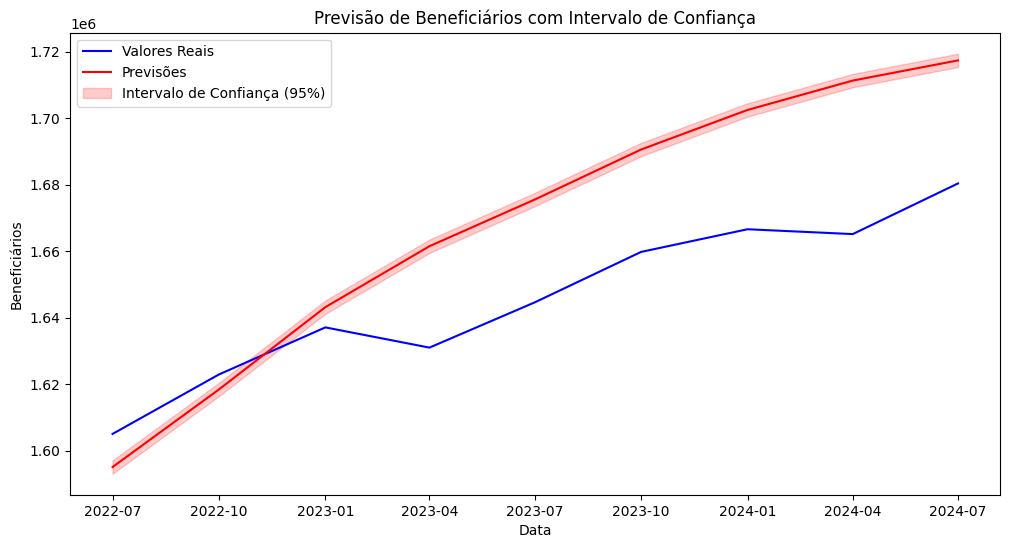

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotar valores reais
plt.plot(df['Data'][SEQ_LENGTH:], df['Beneficiarios'][SEQ_LENGTH:], label="Valores Reais", color='blue')

# Plotar previsões
plt.plot(df['Data'][SEQ_LENGTH:], predictions, label="Previsões", color='red')

# Plotar intervalo de confiança
plt.fill_between(df['Data'][SEQ_LENGTH:], lower_bound, upper_bound, color='red', alpha=0.2, label='Intervalo de Confiança (95%)')

plt.title('Previsão de Beneficiários com Intervalo de Confiança')
plt.xlabel('Data')
plt.ylabel('Beneficiários')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reverter a normalização das previsões e valores reais
y_true = df['Beneficiarios'][SEQ_LENGTH:].values
y_true = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()
y_pred = scaler.inverse_transform(predictions).flatten()

# Calcular métricas de avaliação
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 4720934656.222222
Mean Squared Error (MSE): 2.903616278254656e+19
Root Mean Squared Error (RMSE): 5388521391.118955
Mean Absolute Percentage Error (MAPE): 1.55548454652485%
R-squared (R²): -0.662632546251732


In [ ]:
pip install optuna

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

def create_model(trial):
    # Definindo os hiperparâmetros a serem otimizados
    units_lstm = trial.suggest_int('units_lstm', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    epochs = trial.suggest_int('epochs', 20, 100)  # Agora também otimizamos o número de épocas

    # Criando o modelo LSTM
    model = Sequential()
    model.add(LSTM(units=units_lstm, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(units=units_lstm))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model, batch_size, epochs

def objective(trial):
    model, batch_size, epochs = create_model(trial)

    # Treinar o modelo
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Obter a perda de validação
    val_loss = history.history['val_loss'][-1]

    return val_loss

# Executar a otimização com Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Obter os melhores parâmetros
print("Melhores parâmetros:", study.best_params)
print("Melhor perda:", study.best_value)


[I 2024-09-12 16:27:06,235] A new study created in memory with name: no-name-d36b74b4-8fd5-4f12-bb4f-2922012103fd
<ipython-input-32-3b25fddc2f62>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2024-09-12 16:27:31,106] Trial 0 finished with value: 0.0014506932348012924 and parameters: {'units_lstm': 110, 'learning_rate': 0.0008305860715647631, 'batch_size': 32, 'epochs': 91}. Best is trial 0 with value: 0.0014506932348012924.
[I 2024-09-12 16:27:47,994] Trial 1 finished wit

Melhores parâmetros: {'units_lstm': 103, 'learning_rate': 0.0010227975102254975, 'batch_size': 32, 'epochs': 75}
Melhor perda: 0.000942994374781847


In [ ]:
import optuna
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
# Supondo que você já tenha o 'study' após a otimização com Optuna:
best_params = study.best_params  # Optuna fornece os melhores parâmetros encontrados

# Ajustar parâmetros encontrados
units_lstm = best_params['units_lstm']
learning_rate = best_params['learning_rate']
batch_size = best_params['batch_size']
epochs = best_params['epochs']


In [ ]:
# Criar o modelo com os parâmetros otimizados
model = Sequential()
model.add(LSTM(units=units_lstm, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=units_lstm))
model.add(Dense(1))
#model.add(Dropout(0.2))  # Adicionar camada de dropout para regularização

# Compilar o modelo com o otimizador Adam e a taxa de aprendizado otimizada
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[MeanAbsoluteError()])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.6228 - mean_absolute_error: 0.7814 - val_loss: 0.8349 - val_mean_absolute_error: 0.9128
Epoch 2/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5512 - mean_absolute_error: 0.7356 - val_loss: 0.7211 - val_mean_absolute_error: 0.8482
Epoch 3/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.4831 - mean_absolute_error: 0.6893 - val_loss: 0.6114 - val_mean_absolute_error: 0.7809
Epoch 4/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4171 - mean_absolute_error: 0.6410 - val_loss: 0.5042 - val_mean_absolute_error: 0.7091
Epoch 5/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.3521 - mean_absolute_error: 0.5895 - val_loss: 0.3989 - val_mean_absolute_error: 0.6306
Epoch 6/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.2876 - mean_absolute_error: 0.5334 - val_loss: 0.2962 - val_mean_absolute_error: 0.5431
Epoch 7/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2238 - mean_absolute_error: 0.4711 - val_loss: 0.1984 - val_

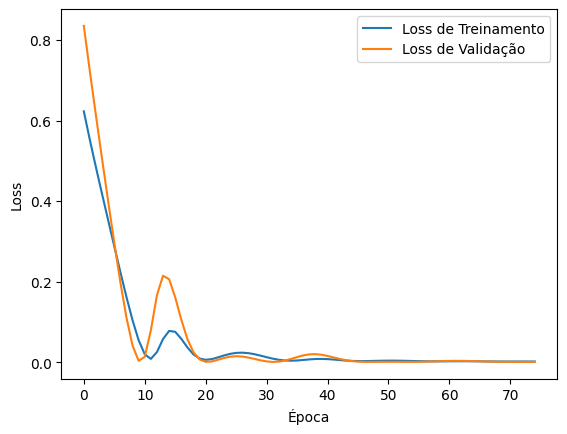

In [ ]:
# Treinar o modelo
history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Verificar o histórico de treinamento
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Função para criar dados de entrada para previsões futuras
def create_future_sequences(data, seq_length, future_steps):
    future_data = []
    last_sequence = data[-seq_length:]
    for _ in range(future_steps):
        future_data.append(last_sequence)
        prediction = model.predict(np.array([last_sequence]))[0, 0]
        last_sequence = np.append(last_sequence[1:], prediction)
        last_sequence = last_sequence.reshape(-1, 1)  # Manter a forma correta
    return np.array(future_data)

# Número de passos futuros a serem previstos (exemplo: até 2025)
future_steps = 6  # Considerando uma previsão a cada trimestre de 2024 e 2025
future_sequences = create_future_sequences(data_scaled, SEQ_LENGTH, future_steps)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [ ]:
# Realizar previsões
future_predictions = model.predict(future_sequences)

# Converter previsões para o formato original
future_predictions_unscaled = scaler.inverse_transform(future_predictions)

# Exibir as previsões futuras
future_dates = pd.date_range(start='2024-01-01', periods=future_steps, freq='Q')
future_df = pd.DataFrame(data=future_predictions_unscaled, index=future_dates, columns=['Previsão'])
print(future_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
               Previsão
2024-03-31  1681815.125
2024-06-30  1687149.625
2024-09-30  1690772.500
2024-12-31  1694014.250
2025-03-31  1698186.875
2025-06-30  1700415.250


In [ ]:
# Ajuste conforme seus dados reais
y_true = np.concatenate([y, future_predictions_unscaled.reshape(-1)])
y_full_pred = np.concatenate([model.predict(X).reshape(-1), future_predictions.reshape(-1)])

# Calcular métricas de avaliação
mse = mean_squared_error(y_true, y_full_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_full_pred)
mape = mean_absolute_percentage_error(y_true, y_full_pred)
r2 = r2_score(y_true, y_full_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R² Score: {r2}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Mean Squared Error (MSE): 1145240065231.9846
Root Mean Squared Error (RMSE): 1070158.89718863
Mean Absolute Error (MAE): 676823.1707351854
Mean Absolute Percentage Error (MAPE): 0.4287253241585633
R² Score: -0.6666505240104714


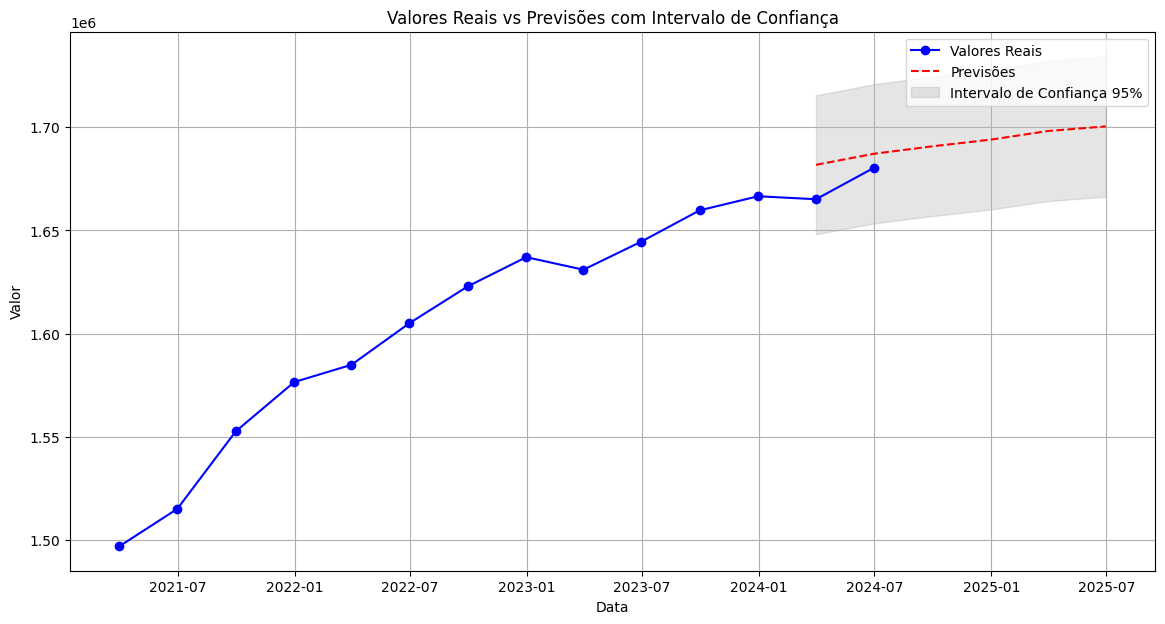

In [ ]:
import matplotlib.pyplot as plt

# Dados reais
data_reais = {
    'Data': pd.to_datetime([
        '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
        '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
        '2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
        '2024-03-31', '2024-06-30'
    ]),
    'Valor': [
        1497018, 1515111, 1552687, 1576558, 1584914, 1605036,
        1622915, 1637070, 1630988, 1644587, 1659765, 1666579,
        1665123, 1680350
    ]
}

df_reais = pd.DataFrame(data_reais).set_index('Data')

# Dados previstos
data_previsto = {
    'Data': pd.to_datetime([
        '2024-03-31', '2024-06-30', '2024-09-30', '2024-12-31',
        '2025-03-31', '2025-06-30'
    ]),
    'Previsão': [
        1681815.125, 1687149.625, 1690772.500, 1694014.250,
        1698186.875, 1700415.250
    ]
}

df_previsto = pd.DataFrame(data_previsto).set_index('Data')

# Para simplicidade, calcularemos o intervalo de confiança com base no erro padrão da previsão
# Considerando que o erro padrão pode ser calculado se tivermos previsões múltiplas, aqui fazemos uma simplificação

# Calculando intervalo de confiança fictício para ilustração
# Se você tiver um modelo que fornece intervalos de confiança, substitua isso pelos valores reais
confidence_interval = 0.02  # Exemplo de intervalo de confiança fictício (2%)
lower_bound = df_previsto['Previsão'] * (1 - confidence_interval)
upper_bound = df_previsto['Previsão'] * (1 + confidence_interval)

# Plotar os dados
plt.figure(figsize=(14, 7))

# Plotar dados reais
plt.plot(df_reais.index, df_reais['Valor'], label='Valores Reais', color='blue', marker='o')

# Plotar previsões
plt.plot(df_previsto.index, df_previsto['Previsão'], label='Previsões', color='red', linestyle='--')

# Plotar intervalo de confiança
plt.fill_between(df_previsto.index, lower_bound, upper_bound, color='gray', alpha=0.2, label='Intervalo de Confiança 95%')

plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Valores Reais vs Previsões com Intervalo de Confiança')
plt.legend()
plt.grid(True)
plt.show()
